# **Python Matplotlib_Venn3-Gene**

**Load Libraries**

In [19]:
from google.colab import files
from google.colab import drive
import numpy as np
import pandas as pd
import csv
from pandas import read_csv

In [18]:
import matplotlib.pyplot as plt
from itertools import zip_longest
from matplotlib_venn import venn3,venn3_unweighted

Load file Data and run

Gene_I: 4478 Gene_IN: 4583 Gene_IM: 3531


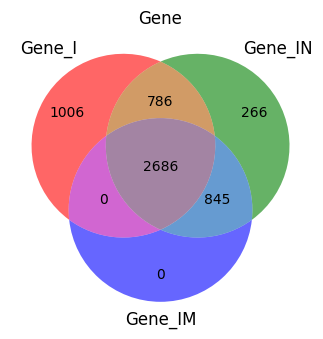

Intersection Data:
len : 1006
I: ['group_3753', 'group_1632', 'group_403', 'group_2550', 'group_2100', 'group_1211', 'group_3170', 'group_2137', 'group_376', 'group_1470', 'group_3561', 'group_3193', 'group_1294', 'group_507', 'group_1159', 'group_3514', 'group_3982', 'group_2702', 'group_612', 'group_3069', 'group_3429', 'group_1238', 'group_703', 'group_2431', 'group_3754', 'group_3688', 'group_3231', 'group_1250', 'group_3220', 'group_957', 'group_3331', 'group_1279', 'group_1652', 'group_3269', 'group_473', 'group_1847', 'group_2465', 'group_1095', 'group_3538', 'group_2318', 'group_216', 'group_3990', 'group_2853', 'group_2001', 'group_4245', 'group_3404', 'group_3724', 'group_2972', 'group_618', 'group_2812', 'group_4251', 'group_3916', 'group_3737', 'group_1287', 'group_1164', 'group_2922', 'group_3172', 'group_1710', 'group_2826', 'group_2508', 'group_3802', 'group_1296', 'group_4382', 'group_4277', 'group_4335', 'group_3519', 'group_1200', 'group_3122', 'group_3238', 'group_44

In [20]:

dfGene1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NewData/gene_presence_absence-ragout-I.csv')
dfGene2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NewData/gene_presence_absence-ragout-IN.csv')
dfGene3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NewData/gene_presence_absence-ragout-IM.csv')

#column Gene
data1 = dfGene1['Gene']
data2 = dfGene2['Gene']
data3 = dfGene3['Gene']

#list values
list1=data1.values.tolist()
list2=data2.values.tolist()
list3=data3.values.tolist()

print("Gene_I:",len(list1),"Gene_IN:",len(list2),"Gene_IM:",len(list3))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#venn3
venn3_unweighted([set(list1), set(list2), set(list3)],
             ('Gene_I', 'Gene_IN', 'Gene_IM'),alpha=0.6)

intersection_data = {
    'I': list(set(list1) - (set(list2) | set(list3))),
    'II': list(set(list2) - (set(list1) | set(list3))),
    'III': list(set(list3) - (set(list1) | set(list2))),
    'I&II': list(set(list1) & set(list2) - set(list3)),
    'I&III': list(set(list1) & set(list3) - set(list2)),
    'II&III': list(set(list2) & set(list3) - set(list1)),
    'I&II&III': list(set(list1) & set(list2) & set(list3)),
}

plt.title("Gene")
plt.show()

print("Intersection Data:")
for key, value in intersection_data.items():
    print("len : "+str(len(value)))
    print(f"{key}: {value}")

listdataI=list(set(list1) - (set(list1) & set(list2) & set(list3)))
listdataIN=list(set(list2) - (set(list1) & set(list2) & set(list3)))
listdataIM=list(set(list3) - (set(list1) & set(list2) & set(list3)))
listinter=list(set(list1) & set(list2) & set(list3))

data = [listdataI,listdataIN,listdataIM,listinter]
columns_data = zip_longest(*data)

future=[['Gene_I'],['Gene_IN'],['Gene_IM'],['Intersection']]
columns_future = zip_longest(*future)

#save file csv
with open("Result_Gene.csv", "w", newline="", encoding="utf8") as f:
  fw = csv.writer(f)
  fw.writerows(columns_future)
  fw.writerows(columns_data)
